**Importing Required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\mythi\Downloads\data\data\demo_data\9.random.csv",header=None)

In [3]:
df.head()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


<AxesSubplot:xlabel='0', ylabel='1'>

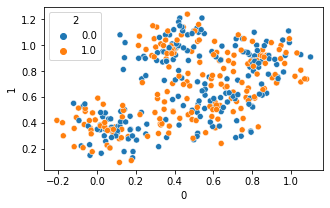

In [5]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = df[0], y = df[1], hue = df[2])

**Splitting train and test data**

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[[0,1]], df[2], train_size = 0.9)

In [7]:
#Shape of 'x_train' and 'y_train'

print(x_train.shape,y_train.shape)

#Shape of 'x_test' and 'y_test'

print(x_test.shape,y_test.shape)

(360, 2) (360,)
(40, 2) (40,)


**Standardizing the train data**

In [8]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [9]:
std_train=std.fit_transform(x_train)

In [10]:
std_train

array([[ 0.35751311, -0.55198856],
       [-0.13192912,  0.25481128],
       [ 0.19216101, -0.83292779],
       [ 0.98585111, -0.12697793],
       [ 1.08506237, -0.56999748],
       [-0.54861642,  0.72664512],
       [ 0.93955252,  1.331745  ],
       [ 1.22726518,  0.70143262],
       [-1.36777075, -0.9013617 ],
       [ 1.31986236,  0.87071652],
       [ 0.04665116,  0.98237185],
       [-1.49310764, -1.85583473],
       [-0.73381078, -1.31916876],
       [-0.3270446 ,  1.07601826],
       [-0.26751784, -0.70326353],
       [ 1.11813279,  0.66901656],
       [-1.95410931, -1.16429201],
       [-0.95868964, -1.9818972 ],
       [ 0.45011029, -1.14988487],
       [ 1.46867926,  0.33405055],
       [ 1.13797505,  0.72664512],
       [ 1.18758068,  0.65100763],
       [-0.25428967,  0.94275222],
       [-1.95410931, -1.67214369],
       [-0.50231783,  1.36776285],
       [-0.03271785, -0.33588146],
       [ 0.76758633,  0.8743183 ],
       [ 0.90317506,  0.11434167],
       [-0.26090376,

**Creating Dense layers**

In [11]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model=Sequential()
model.add(Dense(15, activation = 'tanh', input_dim = 2))
model.add(Dense(10, activation = 'tanh'))
model.add(Dense(5, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                45        
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


**Compile**

In [14]:
model.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

**Fitting**

In [30]:
save=model.fit(x_train,y_train,batch_size=10,epochs=800,verbose=1,validation_split=0.15)

Epoch 1/800
31/31 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5131 - val_loss: 0.7126 - val_accuracy: 0.3333
Epoch 2/800
31/31 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5098 - val_loss: 0.7061 - val_accuracy: 0.3148
Epoch 3/800
31/31 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4967 - val_loss: 0.6993 - val_accuracy: 0.3333
Epoch 4/800
31/31 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.4967 - val_loss: 0.7026 - val_accuracy: 0.3704
Epoch 5/800
31/31 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5196 - val_loss: 0.7055 - val_accuracy: 0.3333
Epoch 6/800
31/31 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4935 - val_loss: 0.7032 - val_accuracy: 0.3519
Epoch 7/800
31/31 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5229 - val_loss: 0.7066 - val_accuracy: 0.3519
Epoch 8/800
3

In [31]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

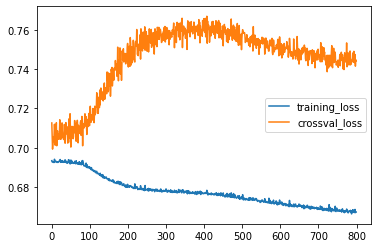

In [33]:
plt.plot(tl,label="training_loss")
plt.plot(cvl,label="crossval_loss")
plt.legend()

In [34]:
pred_train = model.predict(x_train)

12/12 [==============================] - 0s 1ms/step


In [35]:
pred_train

array([[0.5205787 ],
       [0.5134618 ],
       [0.533321  ],
       [0.5055342 ],
       [0.51356995],
       [0.6108455 ],
       [0.45036596],
       [0.4827318 ],
       [0.30035332],
       [0.47718424],
       [0.46301028],
       [0.3222931 ],
       [0.3749484 ],
       [0.5241744 ],
       [0.58974814],
       [0.48305577],
       [0.76368695],
       [0.36233315],
       [0.5310582 ],
       [0.49510372],
       [0.48106286],
       [0.48423222],
       [0.5030518 ],
       [0.77117246],
       [0.5783442 ],
       [0.5317592 ],
       [0.47092268],
       [0.49971306],
       [0.50220704],
       [0.5646209 ],
       [0.4703415 ],
       [0.5030312 ],
       [0.5203376 ],
       [0.48006377],
       [0.3072782 ],
       [0.31190902],
       [0.51313335],
       [0.31025273],
       [0.5180247 ],
       [0.545093  ],
       [0.5068266 ],
       [0.39699692],
       [0.54389733],
       [0.28070143],
       [0.48149645],
       [0.3072129 ],
       [0.47454822],
       [0.539

In [36]:
import numpy as np
train_pred = np.where(pred_train<0.5,0,1)

In [37]:
train_pred.shape

(360, 1)

In [38]:
y_pred = train_pred.flatten()

In [39]:
y_pred.shape

(360,)

<AxesSubplot:xlabel='0', ylabel='1'>

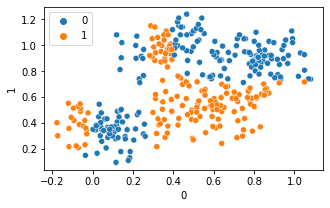

In [40]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_pred)

<AxesSubplot:xlabel='0', ylabel='1'>

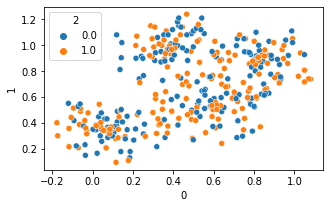

In [41]:
plt.figure(figsize = (5,3))
sns.scatterplot(x=x_train[0],y=x_train[1],hue=y_train)

In [42]:
from mlxtend.plotting import plot_decision_regions

2430/2430 [==============================] - 3s 1ms/step


<AxesSubplot:>

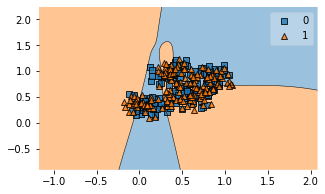

In [43]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)

2430/2430 [==============================] - 3s 1ms/step


<AxesSubplot:>

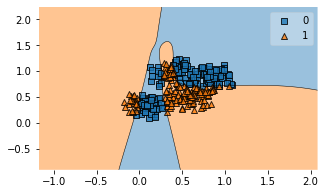

In [44]:
plt.figure(figsize = (5,3))
plot_decision_regions(x_train[[0,1]].values,y_pred.astype(int),clf=model)

In [45]:
from sklearn import metrics
metrics.accuracy_score(y_train, y_pred)

0.5777777777777777